## PR: Implementation

In [78]:
from datetime import datetime

from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [79]:
V = 10
B = 0.9
N = 10000

def gen_data_pr(V, B, N):
    X = np.zeros((N, 3), dtype=int)
    for n in xrange(N):
        p = q = np.random.randint(V)
        while p == q:
            q = np.random.randint(V)
        p, q = sorted([p, q])
        y = np.random.binomial(1, B)
        X[n,:] = np.array([p,q,y])
    return X

X = gen_data_pr(V, B, N)

In [320]:
def get_R_nrm(R, d=None):
    V = R.shape[0]
    R = R.astype(float)
    R += np.eye(V) * R.sum(axis=0) # Add self-edge equal to sum of victories
    Rt = R.T
    idx = Rt.sum(axis=0) > 0
    Rt[:,idx] /= Rt[:,idx].sum(axis=0)
    R_nrm = Rt.T
    
    if d:
        assert d > 0 and d < 1
        R_nrm *= d
        R_nrm += (1 - d) / V
        
    return R_nrm

R = utils.get_interactions(X)
R_nrm = get_R_nrm(R)
R_nrm

array([[ 0.08910891,  0.07920792,  0.15346535,  0.10891089,  0.08415842,
         0.0990099 ,  0.10891089,  0.08415842,  0.07920792,  0.11386139],
       [ 0.        ,  0.18357488,  0.13043478,  0.07729469,  0.0821256 ,
         0.09661836,  0.10628019,  0.10144928,  0.11594203,  0.10628019],
       [ 0.        ,  0.00840336,  0.30252101,  0.09243697,  0.08403361,
         0.07563025,  0.08823529,  0.09663866,  0.10084034,  0.1512605 ],
       [ 0.02631579,  0.01578947,  0.01052632,  0.38421053,  0.1       ,
         0.12631579,  0.10526316,  0.06842105,  0.08421053,  0.07894737],
       [ 0.        ,  0.0060241 ,  0.02409639,  0.01204819,  0.5       ,
         0.09036145,  0.08433735,  0.06024096,  0.09036145,  0.13253012],
       [ 0.01      ,  0.01      ,  0.01      ,  0.005     ,  0.005     ,
         0.52      ,  0.12      ,  0.075     ,  0.1       ,  0.145     ],
       [ 0.025     ,  0.02      ,  0.005     ,  0.01      ,  0.01      ,
         0.01      ,  0.63      ,  0.075     

In [228]:
def power_method(R_nrm):
    V = R_nrm.shape[0]
    x = np.zeros(V) + 1. / V
    prev = x
    while True:
        prev = x
        x = x.dot(R_nrm)
        if np.linalg.norm((x - prev)) < 0.0001:
            break
    return pd.Series(x).sort_values(ascending=False)

power_method(R_nrm)

9    0.555738
8    0.137001
7    0.112428
6    0.065942
5    0.027247
4    0.025761
2    0.024303
3    0.023757
0    0.014600
1    0.013224
dtype: float64

In [229]:
def np_method(R_nrm):
    eigval, eigvec = np.linalg.eig(R_nrm.T)
    eigval = pd.Series(eigval)
    ev = pd.Series(eigvec[:,eigval.idxmax()])
    return (ev / ev.sum()).sort_values(ascending=False) # Normalize to simplex

np_method(R_nrm)

9     (0.556004104522-0j)
8     (0.136819849331-0j)
7     (0.112408460981-0j)
6    (0.0658980317922-0j)
5     (0.027244408273-0j)
4    (0.0257447580201-0j)
2    (0.0243050408312-0j)
3    (0.0237577502466-0j)
0    (0.0145950544083-0j)
1     (0.013222541595-0j)
dtype: complex128

In [321]:
V = 10
B = 0.9
N = 1000
X = gen_data_pr(V, B, N)
R = utils.get_interactions(X)
R_nrm = get_R_nrm(R)
pw_out = power_method(R_nrm)
np_out = np_method(R_nrm)
pw_out

9    0.522430
8    0.165861
7    0.111014
6    0.064652
5    0.039440
4    0.032520
3    0.021263
0    0.014633
1    0.014225
2    0.013963
dtype: float64

In [303]:
def get_error(ordering):
    V = len(ordering)
    return sum(np.abs(ordering.index - np.arange(V)[::-1]))

get_error(pw_out)

4

## Eigenvectors of various graphs

In [325]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

0    0.461514
2    0.230780
3    0.153853
1    0.153853
dtype: float64

In [326]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

0    0.400018
1    0.300036
2    0.199964
3    0.099982
dtype: float64

In [327]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 1, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

2    0.333333
1    0.333333
0    0.333333
3    0.000000
dtype: float64

In [329]:
R = np.array([
        [0, 0, 0, 0],
        [1, 0, 1, 0],
        [1, 0, 0, 1],
        [1, 1, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

0    0.99985
3    0.00005
2    0.00005
1    0.00005
dtype: float64

## Simulations

- Power method
- Error = .9, .7
- N = 10, 100, 1000, 10000
- V = 100

In [322]:
V = 100
B = .9
N = 10

def run_experiment(V, B, N):
    X = gen_data_pr(V, B, N)
    R = utils.get_interactions(X)
    R_nrm = get_R_nrm(R)
    return get_error(power_method(R_nrm))
    
run_experiment(V, B, N)

4380

In [293]:
V = 100
B = .9 

POINTS = [10, 100, 500, 1000, 2500, 5000, 10000]

def run_trial(V, B):
    errors = []
    for N in POINTS:
        results = [run_experiment(V, B, N) for _ in xrange(5)]
        errors.append(sum(results) / float(len(results)))
#     plt.plot(points, errors)
    return errors

run_trial(V, B)

[351874.40000000002,
 233768.79999999999,
 152197.60000000001,
 117412.39999999999,
 87016.800000000003,
 62883.199999999997,
 42932.400000000001]

## Trials

In [304]:
B_vals = [1, .9, .7]

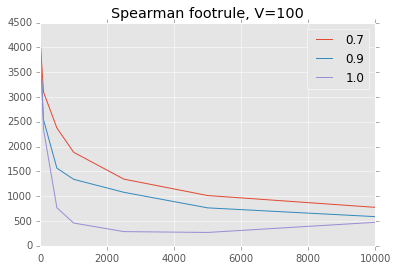

In [319]:
results = {}
V = 100
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))

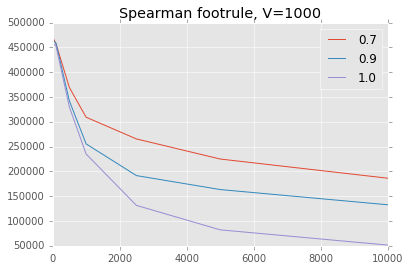

In [314]:
results = {}
V = 1000
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))